---
# <center> Практична робота №3 </center>
## __Тема. Алгоритми пошуку та їх складність__
## __Мета:__ опанувати основні алгоритми сортування та навчитись методам аналізу їх асимптотичної складності.
### _Викoнав Міняйло Марк 27.04.24_
----

## <center> Хід роботи </center>
#### 1) Оцінити асимптотичну складність алгоритму лінійного пошуку у 𝑂-нотації в найгіршому і в найкращому випадку. Як можна покращити алгоритм лінійного пошуку?у?

In [ ]:
def linear_search(a_list, x):                ##          у найкращому # у найгіршому
    i, length = 0, len(a_list)               ##  c1           1       #       1      
    while i < length and x != a_list[i]:     ##  c2           1       #      n+1      
        i += 1                               ##  c3           0       #       n             
    return i+1 if i < length else -1         ##  c4           1       #       1        
    
# у найкращому: (c1 + c2 + c4) = O(1)
# у найгіршому: (c2 + c3)n + (c1 + c2 + c4) = a * n + b = O(n)
# Покращити можна, якщо попередньо масив впорядкувати.

#### 2) Оцінити асимптотичну складність алгоритму бінарного пошуку у 𝑂-нотації в найгіршому і в найкращому випадку

In [ ]:
def bin_search(a_list, x, left, right):                    ##         у найкращому # у найгіршому
    if left > right or len(a_list) == 0:                   ##  c1          1       #       1        
        return -1                                          ##  c2          0       #       0
    middle = (left + right) // 2                           ##  c3          1       #       1
    if a_list[middle] == x:                                ##  c4          1       #       1
        return middle + 1                                  ##  c5          1       #       0
    elif (a_list[middle] < x):                             ##  c6          0       #       1
        return bin_search(a_list, x, middle + 1, right)    ##  c7          0       #     Log2(n)
    else: # a_list[middle] > x                             ##  c8          0       #       1
        return bin_search(a_list, x, left, middle - 1)     ##  c9          0       #     Log2(n)

# У найкращому: (с1 + с2) або (с1 + с3 + с4 + с5), в будь-якому випадку = О(1)
# У найгіршому: (с7 + с9)Log2(n) + (с1 + с3 + с4 + с6 + с7) = a * Log2(n) + b = O(Log2(n))

#### 3) Побудувати алгоритм тернарного пошуку і оцінити його асимптотичну складність алгоритму у 𝑂-нотації в найгіршому і в найкращому випадку. Який з алгоритмів є оптимальнішим: бінарний, чи тернарний? Обґрунтувати відповідь відповідними обчисленнями

In [ ]:
def ternary_search(a_list, x, left, right):                ##         у найкращому # у найгіршому
    if (right >= left):                                    ##  c1          1       #       1
        mid1 = left + (right-left) // 3                    ##  c2          1       #       1
        mid2 = right - (right-left) // 3                   ##  c3          1       #       1
        if (a_list[mid1] == x):                            ##  c4          1       #       1
            return mid1                                    ##  c5          1       #       0
        if (a_list[mid2] == x):                            ##  c6          0       #       1
            return mid2                                    ##  c7          0       #       0
        if (x < a_list[mid1]):                             ##  c8          0       #       1
            return ternary_search(a_list, x, left, mid1-1) ##  c9          0       #     Log3(n)
        elif (x > a_list[mid2]):                           ##  c10         0       #       1
            return ternary_search(a_list, x, mid2+1, right)##  c11         0       #     Log3(n)
        else:                                              ##  c12         0       #       1
            return ternary_search(a_list, x, mid1+1, mid2-1)## c13         0       #     Log3(n)
    return -1                                              ##  c14         0       #       1
# У найкращому: О(1)
# У найгіршому: O(Log3(n))
# Бінарний пошук має менше порівнянь, тернарний пошук менше кроків
# Також при використанні тернарного пошуку можуть виникнути проблеми через помилки округлення при визначенні середніх індексів
# Думаю оптимальнішим буде бінарний пошук, хоча однозначно є задачі з якими краще справиться тернарний пошук

#### 4) Порівняти ефективність алгоритмів лінійного, бінарного та тернарного пошуку для різних розмірів вхідного списку. Для цього провести експериментальне дослідження та побудувати графіки залежності часу виконання алгоритму від розміру вхідного списку

Червоною лінією зображено binary search, синьою ternary search, чорною лінією linear search


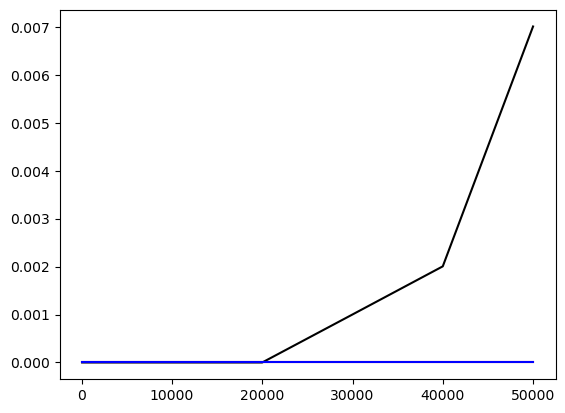

In [48]:
import matplotlib.pyplot as plt
import time
import random
import numpy as np
%matplotlib inline

def linear_search(array, target):
    for i in range(len(array)):
        if array[i] == target:
            return i
    return -1
    
def bin_search(array, target):
    low = 0
    high = len(array) - 1

    while low <= high:
        mid = (low + high) // 2
        if array[mid] < target:
            low = mid + 1
        elif array[mid] > target:
            high = mid - 1
        else:
            return mid
    return -1

def ternary_search(a_list, x, left, right):               
    if (right >= left):                                    
        mid1 = left + (right-left) // 3                    
        mid2 = right - (right-left) // 3                  
        if (a_list[mid1] == x):                           
            return mid1                                    
        if (a_list[mid2] == x):                         
            return mid2                                 
        if (x < a_list[mid1]):                            
            return ternary_search(a_list, x, left, mid1-1)
        elif (x > a_list[mid2]):                           
            return ternary_search(a_list, x, mid2+1, right)
        else:                                           
            return ternary_search(a_list, x, mid1+1, mid2-1)
    return -1

sizes = [50, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000]
arrays = []
for size in sizes:
    array = [random.randint(0, 100) for _ in range(size)]
    arrays.append(array)

timeI = [] 
timeB = [] 
timeT = [] 

for n in range(len(sizes)):
    array = np.sort(arrays[n])
    target = random.choice(array)

    start_time = time.time()
    linear_search(array, target)
    timeI.append(time.time() - start_time)

    start_time = time.time()
    bin_search(array, target)
    timeB.append(time.time() - start_time)

    start_time = time.time()
    ternary_search(array, target, 0, len(array) - 1)
    timeT.append(time.time() - start_time)

plt.plot([50, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000], [timeB[0], timeB[1],timeB[2],timeB[3],timeB[4],timeB[5],timeB[6],timeB[7],timeB[8],timeB[9]], color='red')
plt.plot([50, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000], [timeI[0], timeI[1],timeI[2],timeI[3],timeI[4],timeI[5],timeI[6],timeI[7],timeI[8],timeI[9]], color='black')
plt.plot([50, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000], [timeT[0], timeT[1],timeT[2],timeT[3],timeT[4],timeT[5],timeT[6],timeT[7],timeT[8],timeT[9]], color='bl')
print("Червоною лінією зображено binary search, синьою ternary search, чорною лінією linear search")

#### 5) Порівняти алгоритми пошуку за їхньою здатністю працювати з відсортованими та не відсортованими списками

Із цих трьох пошуків тільки лінійний може працювати з невісортованими списками

#### 6) Розглянути сценарії використання кожного з алгоритмів пошуку у практичних задачах і обґрунтувати вибір кожного алгоритму в конкретному випадку.
Лінійний слід використовувати для невідсортованих невеликих списків, наприклад, пошук оц/інок учня у класі за ім'ям.

Бінарний для всіх відсортованих спиків, наприклад, пошук телефону у телефонній книзі, звісно ім'я у списоку повинні бути відсортованні за алфавітом. 

Тернарний для всіх великих відсортованих списків, коли функція монотонна, і має багато локальних мінімумів або максимумів, наприклад, як у оптимізаційних задачах.

---
## <center> Контрольні питання </center> 
__*1. Що таке алгоритм пошуку і чому він важливий у контексті комп'ютерних наук?*__

Алгоритм пошуку - це алгоритм який допомагає нам знайти потрібний елемент у списку, важлий у контексті ком'пютерних наук, особливо при роботі з базами данних

__*2. Які основні критерії оцінки ефективності алгоритмів пошуку?*__

Асимптотична складність, швидкість, для яких масивів застосовується( відсортовані, невідсортовані), кількість порівнянь 

__*3. Що таке лінійний пошук, і як він працює?*__

Йде лінійно по списку і перевіряє чи це є потрібний нам елемент, чи ні, якщо знаходить надсилає індекс

__*4. Які умови повинні бути виконані для успішного застосування бінарного пошуку?*__

Масив повинен бути попередньо відсортований

__*5. Які переваги та недоліки використання бінарного пошуку порівняно з іншими алгоритмами пошуку?*__

Із переваг швидкість, з недоліків потрібно виртрачати час для відсортування масиву

__*6. Що таке тернарний пошук, і в чому його відмінність від бінарного пошуку?*__

Логіка майже така сама як і бінарного пошуку, але ділить список не на дві частини при перевірці, а на три